In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Meu arquivo de dados, baixado pelo Github, está em:
G:\developer\GitHub\agendamento-hospitalar\dados\A151346189_28_143_208.csv

A página original é esta aqui: 
https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

A informação são os dados de internação do SUS, de 2008 em diante, por Unidade da Federação.

Para abrir o arquivo vamos usar o pandas

In [ ]:
import pandas as pd

Vou importar o arquivo de texto e fazer o upload para a VM do Colab e, para abrir o arquivo, faço referência ao arquivo local no Colab (clique no botão direito para ver o caminho).

Erros:
1) O padrão de formato do pandas é UTF8, mas o do governo do Brasil não é... Alterar o enconding.
2) Problema ao tokenizar... erro de separador.
3) Problema ao tokenizar... Primeiras linhas não são dados. Devemos pular.
A partir disso não dá mais erro, só que as últimas linhas ficam com "lixo".
4) Para tirar isso, usamos skipfooter (=12 para tirar as últimas 12 linhas) 

Arquivo Alura: A151346189_28_143_208.csv
Meu download: A211521189_28_143_208-Marco-Mod01.csv
Nota: 2 arquivos são iguais

In [ ]:
dadosMarco = pd.read_csv("/content/drive/MyDrive/Bootcamp-Alura/A211521189_28_143_208-Marco-Mod01.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12)
dadosAlura = pd.read_csv("/content/drive/MyDrive/Bootcamp-Alura/A151346189_28_143_208.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [ ]:
dadosMarco.head()



,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7948291,63","8438077,45","7656644,83","8047742,98","8657206,23","8150893,68","7507845,13","7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9221412,18","7493310,88","8092260,11","7273843,63","7652120,28","8725530,68","11152107,08","10285455,78","929129659,72"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"2397512,85","2348760,00","3139155,41","2765062,92","4540084,78","4120228,96","2610454,55","3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20",-,"420668039,63"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"12789637,85","14376990,41","14240071,26","13594647,25","14584288,95","13158724,61","13169660,32","13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15731201,23","15744605,61","14346553,60","16018459,07","14913745,37","15068304,35","13509579,29","19658585,46","20897542,93","19346450,18","14726443,67","1771654871,23"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18

In [ ]:
dadosAlura.head()


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,"1388528,39","2931283,42","1541682,52","1525314,96","1645953,84","1406150,68","3065279,01","3231494,61","3117178,63","3068430,44","2825838,52","2931173,58","2885269,07","2860103,74","3684944,68","3607289,68","3774356,60","3706711,84","3763187,55","3533625,83","3605007,43","3907032,72","3939820,71","3901084,11","3684407,02","3623015,58","3890461,90","4193533,87","4534400,67","4451208,03","4874592,78","4460802,38","5067886,24","4511092,85","4394680,50","4098741,80","4411499,48","3868617,95","4298702,78",...,"7948291,63","8438077,45","7656644,83","8047742,98","8657206,23","8150893,68","7507845,13","7998345,94","8893683,69","8867793,32","8871408,50","8501601,67","8315107,81","8525499,78","9177611,46","7368996,38","8835095,43","8328186,64","8408512,77","9351705,82","8143007,97","8949741,77","9630553,15","9581970,31","7891114,05","9792370,67","9170787,53","8816846,71","10024554,15","9675423,70","8085025,66","9221412,18","7493310,88","8092260,11","7273843,63","7652120,28","8725530,68","11152107,08","10285455,78","929129659,72"
1,12 Acre,"902416,00","1497206,26","1794028,48","1730469,42","1819443,92","1828496,00","2511754,59","2089107,14","2275708,53","1923886,57","1756986,80","2235639,98","2497116,43","2253558,01","2122673,92","2834317,62","2722065,97","2432831,95","2630190,65","2307579,00",-,"2826477,02","2170791,18","2541526,44","2491042,33","1954473,90","2389996,38","2654878,60","2844085,21","2336207,19","2125143,06","2430293,67","2377738,44","2184746,84","2468452,90","2516284,54","3051370,08","2629104,42","2485451,79",...,"2397512,85","2348760,00","3139155,41","2765062,92","4540084,78","4120228,96","2610454,55","3576595,19","2444567,37","2602434,35","3064163,42","2276236,69","3239474,10","3126429,88","2998865,51","2619709,86","3018048,94","3342614,24","2123426,26","2664654,52","1906429,95","3096439,63","2411628,00","2840630,58","3260153,59","3250722,84","3204998,88","3052745,65","3124802,29","3021521,75","2874871,28","3331803,55","3417691,07","3076003,20","2286642,60","2896340,24","3045245,80","3915193,20",-,"420668039,63"
2,13 Amazonas,"4735529,42","7118990,57","8196635,49","8259378,42","7831399,90","8477273,62","9368858,72","9352532,70","9363099,35","8618318,83","6555549,08","7777645,88","7403068,36","6683346,89","9927781,20","8844511,21","9079035,96","8832894,53","9373395,97","9578326,03","9730634,16","9179252,65","8314648,93","9050439,39","9419460,86","8680178,57","9168055,41","9897901,80","9651362,37","10854599,47","10417122,89","8718347,13","8221592,12","9613977,03","9927574,41","9470661,21","9736750,91","8745259,80","9380112,36",...,"12789637,85","14376990,41","14240071,26","13594647,25","14584288,95","13158724,61","13169660,32","13572263,03","13083081,70","14322305,22","14643340,51","14632208,09","14500521,14","14840533,42","14427620,91","15818964,25","16358462,57","15391163,74","14154362,85","16791397,31","14369987,43","16339024,96","15622910,63","16483166,92","15422243,28","15961988,04","15787896,78","16515441,67","15731201,23","15744605,61","14346553,60","16018459,07","14913745,37","15068304,35","13509579,29","19658585,46","20897542,93","19346450,18","14726443,67","1771654871,23"
3,14 Roraima,"657889,53","777939,31","718688,03","839994,39","862347,96","832440,66","996693,09","894271,18

In [ ]:
dadosMarco.tail()
dadosAlura.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30","53637713,13","53699506,08","58730379,58","57629317,06","58779088,02","63366430,89","62200230,97","61683824,68","62495363,90","64614271,83","66457445,34","66425009,36","65782428,73","63714541,87","64488493,88","66304168,50","61527419,52","62490522,38","66814413,40","67900518,35","64799726,75","68518232,07","68731297,03","66174969,16","66891309,48","67456434,73","67096302,52","60754144,32","58884339,85","66205364,40",...,"89585823,81","96174533,70","92176170,61","94228360,83","90655015,78","91242720,70","82934746,93","88817066,36","80572288,45","87419899,25","89396935,52","88148251,61","90754504,49","89093690,14","94010888,97","93664724,68","90025945,36","93081292,31","89050712,34","89664703,23","89259306,50","85585754,75","95152786,47","94163838,23","92237333,46","102298314,76","100260145,30","95917106,56","102331615,05","93971904,79","90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86051002,13","100531035,83","101374341,51","11958647088,33"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05","9547923,55","9450010,19","8365709,79","10033643,71","10746263,10","10849523,03","10902848,13","11991649,26","12050259,66","12174950,98","11178470,01","11997775,92","11686533,15","10756188,43","10565385,71","12148432,58","11270972,80","11947693,50","11435565,54","12392541,52","12441459,98","12025317,84","12353546,78","12381792,58","12340247,31","12467693,91","12356930,32","11209008,55","9656677,02","13698836,79",...,"15676843,15","16956118,78","17043069,32","17477126,81","15488155,75","16596703,72","15353997,67","16320629,25","18448053,83","16620321,36","16682027,02","17555832,83","17357780,20","17090876,79","16468255,95","17395858,50","16259261,13","16390075,24","15350893,92","17108719,02","17713810,57","16882690,96","18253870,27","17778458,45","18387822,48","19870933,20","18913862,69","19591383,84","18935437,09","17230688,81","17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17331445,92","18755557,92","19241624,02","2172157981,36"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89","9677093,95","7150345,50","10421826,32","9939399,66","9332546,32","11965500,15","11185014,96","12058150,55","11635436,04","11698836,48","11823239,61","10810420,65","12130636,06","11574096,75","10726251,53","12364760,67","11382133,07","11947040,32","12233217,84","12656421,09","11263407,74","12795267,96","12805173,87","12171713,91","11961452,83","11777799,00","11142684,27","11709080,86","11149107,81","12381255,67",...,"15509614,84","16372281,19","16231682,70","16044219,39","16146542,89","15487676,02","14770731,99","17253950,09","14789801,16","17498946,87","16279852,74","16103988,77","15883977,51","17163673,03","15569285,17","15630276,46","15838064,68","14815961,13","13853034,99","14229113,36","15288698,79","16045499,92","15890208,95","16092716,67","16699780,69","16314811,22","16763581,32","15608982,84","15855641,23","15811477,04","15029205,51","15249

In [ ]:
dadosAlura.mean()

Series([], dtype: float64)

Ainda não consigo tratar os números importados como números ... 
1) Preciso tratar o valor do texto importado para ser considerado número (decimais e separadores de milhar devem ser definidos).
2) Vai dar certo, mas os números ficarão em notação científica.
2.1) Tenho que usar as opções do Pandas para modificar isso.


In [ ]:

dadosMarco = pd.read_csv("/content/drive/MyDrive/Bootcamp-Alura/A211521189_28_143_208-Marco-Mod01.csv", encoding="ISO-8859-1", 
                         sep=";", skiprows=3, skipfooter=12,
                         thousands=".",decimal=",")
dadosAlura = pd.read_csv("/content/drive/MyDrive/Bootcamp-Alura/A151346189_28_143_208.csv", encoding="ISO-8859-1", 
                    sep=";", skiprows=3, skipfooter=12,
                    thousands=".", decimal=",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
dadosMarco.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

Aqui dá para ver como é mostrada a informação de número antes e depois da formatação da saída...

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dadosMarco.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

Agora quero, por exemplo, fazer um "where", ou seja, filtrar os dados para trazer informação de um determinado mês.

In [ ]:
dadosMarco['2008/Ago'].mean()

27800320.306666665

In [ ]:
dadosAlura['2008/Ago'].mean()

27800320.306666665

Mostrar um gráfico simples do mês para cada UF

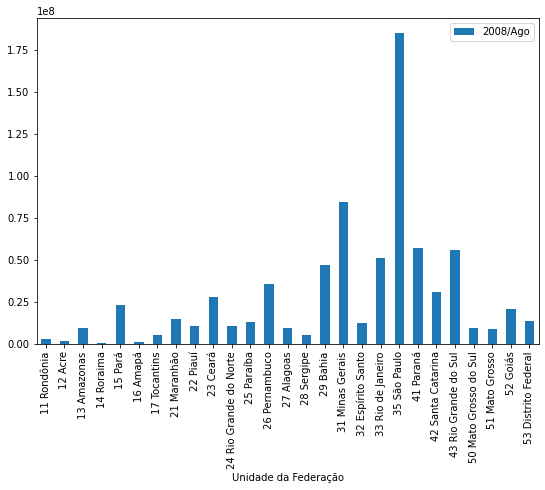

In [ ]:
dadosMarco.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))


Melhorando o gráfico porque precisamos melhorar os números da visualização. Só que o pandas não tem recursos gráficos, ele usa o Matplotlib, que preciso importar para melhorar detalhes de visualização dos dados.

Text(0.5, 1.0, 'Valor por Unidade Federativa')

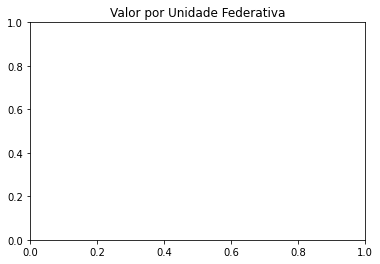

In [ ]:
import matplotlib.pyplot as plt

plt.title("Valor por Unidade Federativa")


Vamos continuar... agora melhorando os gráficos, ver eixos, etc. Mas a documentação de ajuda é outra, do Matplotlib... Achei alguns dados aqui https://matplotlib.org/api/ticker_api.html?highlight=format 
Mas não era o suficiente para quem não conhece do assunto, o instrutor da Alura indicou importar: 
matplotlib.ticker.FormatStrFormatter (mas este a documentação diz que é antigo)

Ah, alguns minutos depois o instrutor falou que o método é antigo e não serve mais, que há um método melhor.
matplotlib.ticker.StrMethodFormatter
Nota: o formato a ser utilizado é "{x:.2f}".
Eu tentei mudar o "X" para "a" e deu erro... o número precisa mesmo ser identificado como "x".
O "f" é de float, indicando 2 pontos depois da vírgula.


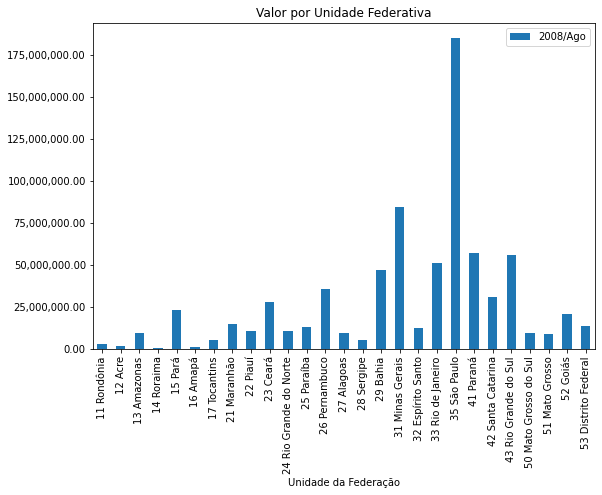

In [ ]:
import matplotlib.ticker as ticker;

ax = dadosMarco.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por Unidade Federativa")
plt.show()

Desafio 1: colocar uma mensagem mais descritiva para o gráfico

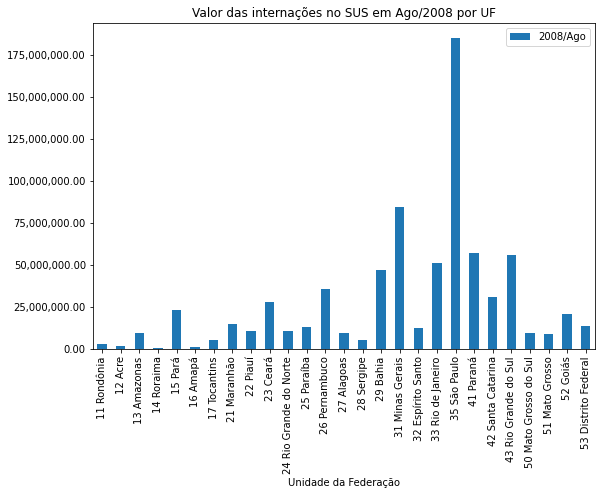

In [ ]:
import matplotlib.ticker as ticker;

ax = dadosMarco.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor das internações no SUS em Ago/2008 por UF")
plt.show()

Desafio 2: faça a mesma análise para o mês mais recente

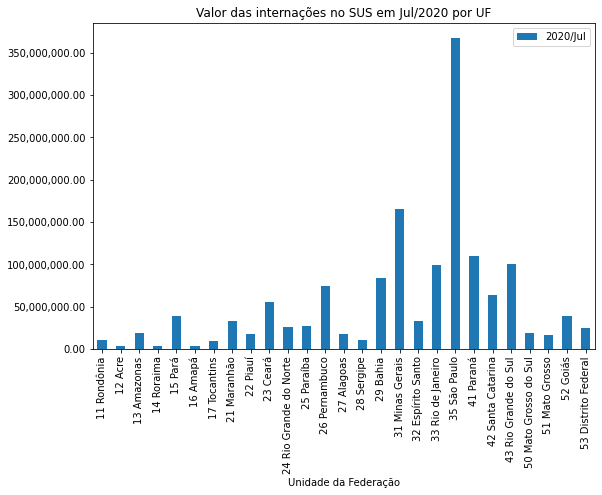

In [ ]:
import matplotlib.ticker as ticker;

ax = dadosMarco.plot(x="Unidade da Federação", y="2020/Jul", kind="bar",figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor das internações no SUS em Jul/2020 por UF")
plt.show()

## Módulo 2

Módulo 2 - outras fontes de dados do SUS
Lembrando da fonte: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

Reassisti o vídeo 3 da parte 1 para saber qual arquivo é referenciado neste Módulo 2.



In [ ]:
import pandas as pd
dadosDois = pd.read_csv("/content/drive/MyDrive/Bootcamp-Alura/A211736189_28_143_208-Marco-Mod02.csv", encoding="ISO-8859-1", 
                        sep=";", skiprows=3, skipfooter=12,
                        thousands=".", decimal=",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [ ]:
dadosDois.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


E agora para ver dois meses? Não consigo selecionar se fizer como uma lista de itens:
dadosNovos["2010/jan","2011/jan"]

Tenho que fazer uma lista dentro do array:
dadosNovos[["2010/jan","2011/jan"]] 

Ah, e é case sensitive, para dar certo precisa ser: 2010/Jan, não "jan" ("j" minúsculo).

In [ ]:
dadosDois[["2010/Jan","2011/Jan"]]

,2010/Jan,2011/Jan
0,3812315.59,4173529.95
1,2381535.93,2749521.65
2,9386945.03,9800511.52
3,1617781.76,1604886.45
4,26421157.74,27999789.20
5,1713037.45,1865892.98
6,6255630.25,6941869.25
7,19282093.56,20558875.99
8,12554360.19,14558579.44
9,34001962.62,34637771.87


Agora vou verificar se meu arquivo é igual ao da Alura... (parte 2, aula 1, 6:09 de vídeo)

In [ ]:
dadosDois[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Tudo indica que meus arquivos são iguais. Vou seguir com os meus (importante praticar e comparar).

E como pegar apenas as colunas/linhas onde há valor? Vamos ver um dos jeitos usando o Pandas... A média, por exemplo, ignora os nulos.
Importante: isso não dará certo se a importação de números não estiver correta. É preciso verificar apenas a média. Se não vier é preciso fazer o tratamento de números já feito alguns comandos acima, na importação (indicar decimal e milhar). 

In [ ]:
dadosDois.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

Preciso entender porque o notnull e notna do Pandas não indicam as colunas certas (a pergunta pode não ser o que é nulo, mas o que não é número).

In [ ]:
dadosDois.notna()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,T

Seguindo com a aula, após encontrar os índices das células utilizadas para obter média

In [ ]:
dadosUteisIndex = dadosDois.mean().index
dadosUteisIndex

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

Porém esta estratégia não é muito boa... Precisamos de uma lista mutável, o que não acontece com o uso de index...
Precisamos converter este index para lista com o comando tolist. (repara que muda até a forma de mostrar a resposta)

In [ ]:
dadosUteisLista = dadosDois.mean().index.tolist()
dadosUteisLista

A ideia do index é usar a lista de "colunas" como índice, mas ela não pode ser alterada. Se eu quiser incluir um item na lista, ou até excluir, o Python vai me ignorar.
Repare como usar os dois para filtrar itens, por exemplo...

In [ ]:
dadosDois[dadosUteisIndex]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587

In [ ]:
dadosDois[dadosUteisLista]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587

Exemplos de insert... No indice...


In [ ]:
dadosUteisIndex.insert(0,"Meu teste de UF")

Index(['Meu teste de UF', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov',
       '2007/Dez', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=158)

In [ ]:
dadosUteisIndex[0]

'2007/Ago'

Exemplos de insert... Na lista

In [ ]:
dadosUteisLista.insert(0,"Meu teste de UF")

In [ ]:
dadosUteisLista[0]

'Meu teste de UF'

Arrumando a lista para o que era antes, rsrsr. O que a gente não faz em nome da ciência? Detalhe: se executar o item mais de uma vez serão criados N linhas "Meu teste de UF". Execute o comando abaixo a mesma quantidade de vezes que inseriu e tudo bem. O remove vai pelo texto exlcuir a primeira ocorrência dele...

In [ ]:
dadosUteisLista.remove("Meu teste de UF")

In [ ]:
dadosUteisLista[0]

'2007/Ago'

Agora vou realmente incluir um item novo para fazer gráfico, conforme a aula pede... dadosUteisLista.insert(0, "Unidade da Federação")

In [ ]:
dadosUteisLista.insert(0, "Unidade da Federação")

In [ ]:
dadosDois[dadosUteisLista].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

O insert foi proposital, para criarmos um índice do conjunto de dados por este valor (coluna), uma vez que Unidade da Federação é o que indica a que ser refere a linha (e seus outros valores).
Vou criar um subconjunto de dadosDois, o dadosUteis que é resultado da filtragem de dadosDois utilizando dadosUteisLista... Depois disso crio o índice por Unidade da Federação.
Importante:
Funciona> dadosUteis = dadosUteis.set_index("Unidade da Federação")
Não Funciona> dadosUteis.set_index("Unidade da Federação")
Tenho que atribuir novamente o conjunto com índice ao meu data frame (ou data set) para armazenar.

In [ ]:
dadosUteis = dadosDois[dadosUteisLista]
dadosUteis = dadosUteis.set_index("Unidade da Federação")

Agora os comandos para achar coluna no meu novo dataset e localizar linha (loc) pelo índice. 

In [ ]:
dadosUteis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [ ]:
dadosUteis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

In [ ]:
dadosUteis.loc["35 São Paulo"]

2007/Ago       1665349.90
2007/Set       4434168.64
2007/Out      14577395.84
2007/Nov      35032259.98
2007/Dez      76668547.41
                ...      
2020/Abr     251696362.66
2020/Mai     302857660.98
2020/Jun     299060851.62
2020/Jul     282709570.31
Total      38929353900.57
Name: 35 São Paulo, Length: 157, dtype: float64

Vamos fazer um gráfico? Mas eu tenho alguns problemas. Como abaixo, o plot vai trazer minhas linhas como colunas e, as colunas, como linhas. Então vou precisar transpor (rotacionar) os dados. Tem mais um problema, a linha Total, que geraria uma distorção nos dados.

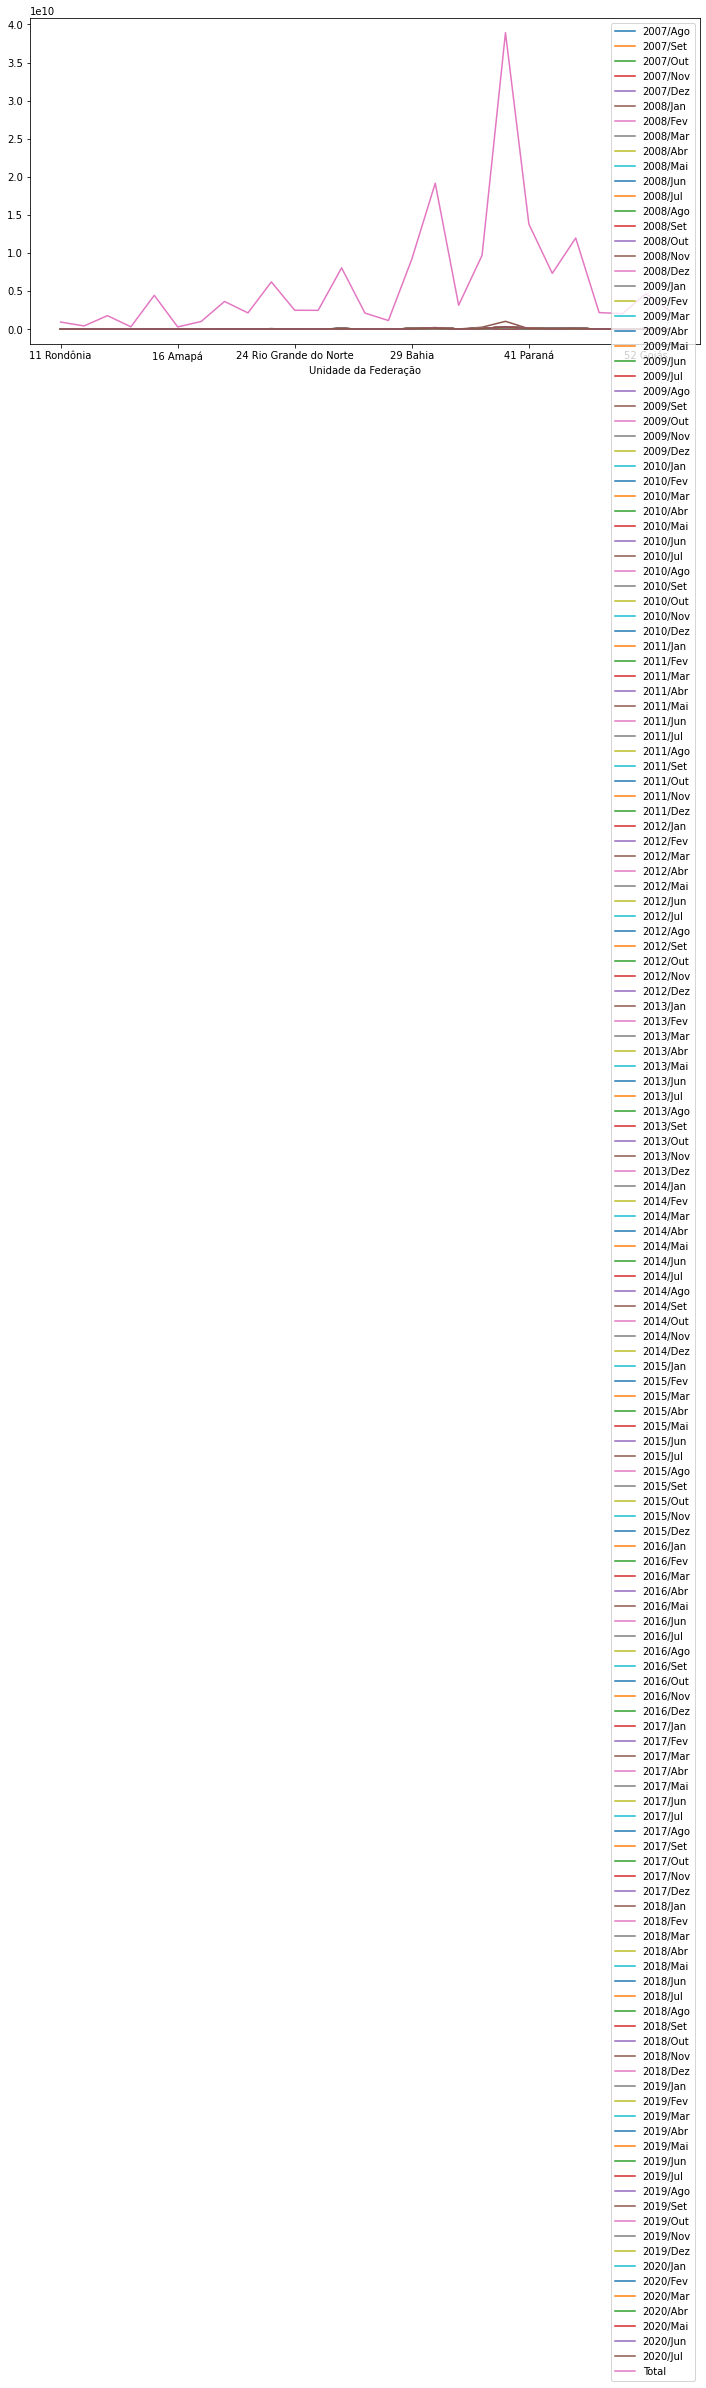

In [ ]:
dadosUteis.plot(figsize=(12,6))

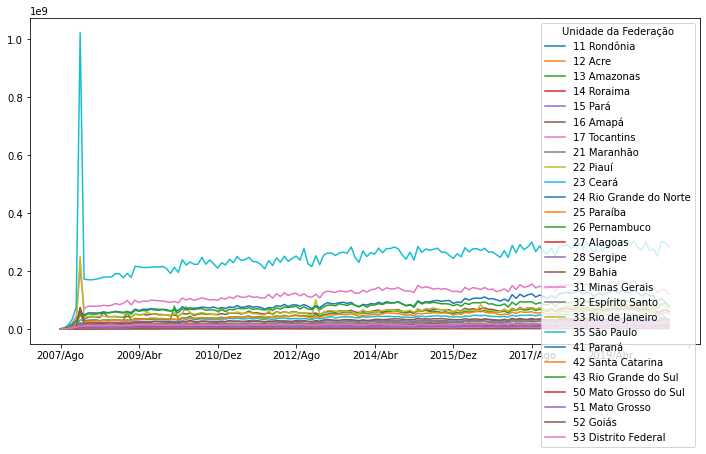

In [ ]:
dadosUteis = dadosUteis.drop("Total", axis= 1)
dadosUteis.T.plot(figsize=(12,6))

Desafio 1: reposicionar a legenda para não ficar sobre o gráfico

1) Solução sacana... sem legenda não há problema... mas teria que colocar a informação no título ou em outro local. Ou seja, é uma solução que parece inteligente, mas não é... hahaha

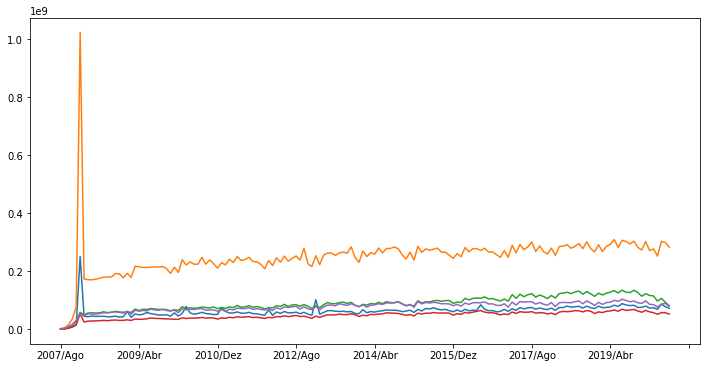

In [ ]:
dadosUteis[-9:-4].T.plot(figsize=(12,6), legend=False)

2) Solução decente... e informativa.
Note que com 5 registros fica tudo bem. O problema é com uma lista gigante de itens a plotar.
Outra coisa: a verdade não está no Pandas, está no MatPlotLib.

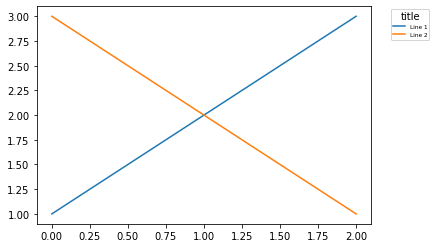

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')

p1, = plt.plot([1, 2, 3], label='Line 1')
p2, = plt.plot([3, 2, 1], label='Line 2')
plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

Difícil está sendoentender o funcionamento, rs.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

labels=dadosUteis.index.to_list

for i in labels:
    ax.plot(x, i * x, label='$y = %ix$' % i)


<bound method IndexOpsMixin.tolist of Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')>

Desafio 2: selecionar 5 estados

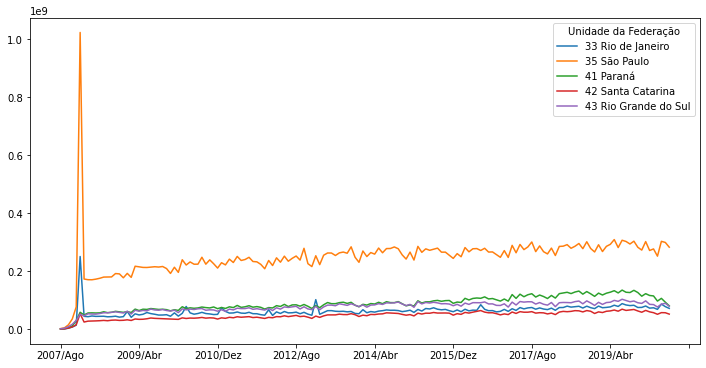

In [ ]:
dadosUteis[-9:-4].T.plot(figsize=(12,6), legend=True)

## Módulo 3: início. 

Fazer aleatório (N)

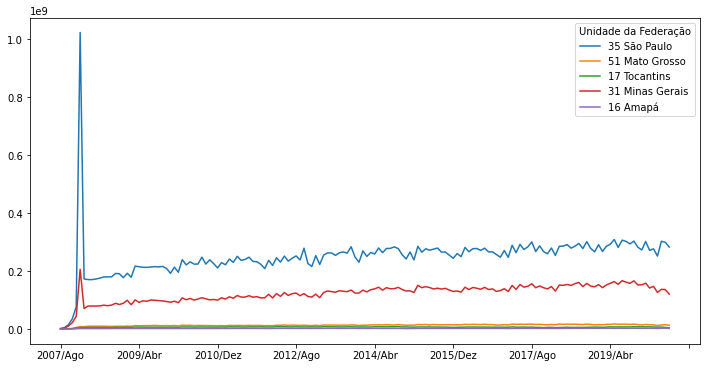

In [ ]:
dadosUteis.sample(n=5).T.plot(figsize=(12,6))

Falando em aleatoriedade, vamos colocar o mesmo seed para poder reproduzir o mesmo teste em computadores diferentes.
Vamos fazer isso com numpy

Vamos colocar o mesmo seed da aula da Alura 14:14 da aula 1, mod 3. E, como lá, solicitar 7 estados.

In [ ]:
import numpy as np
np.random.seed(687942)

dadosUteis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18225302.41,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90

In [ ]:
dadosUteis.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,54104976.28,60195929.05,58296066.50,58362424.47,60181080.42,55168339.49,56655278.59,56069454.96,52426527.16,55200330.53,50094672.65,58796191.84,61160709.55,60093810.34,61237932.18,63709506.55,63061083.41,59354217.40,63961626.64,61553236.70,53908557.78,59452473.88,57176215.74,61547622.60,62756764.33,65813210.22,61817516.05,68759673.19,64503540.72,66075691.36,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,19

Procurar sobre pseudo randomness

Desafio 1: adicionar coluna região. Para adicionar coluna nova faço assim: 

Quero somar valores da linha
dadosUteis.sum(axis=1)
Quero criar coluna com a soma dos valores e chamar isso de Total
dadosUteis["Total"] = dadosUteis.sum(axis=1)

In [ ]:
dadosUteis["Região"] = "Brasil"

Agora eu arrumo os dados
dadosUteis["Região][0:8]

In [ ]:
dadosUteis["Região"][0:7] = "NO"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dadosUteis["Região"][7:16] = "NE"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dadosUteis["Região"][16:20] = "SE"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dadosUteis["Região"][20:23] = "SU"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dadosUteis["Região"][23:] = "CO"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Agora, visualizando o resultado de um jeito mais compacto... (última coluna é "Região"... 
Siglas das regiões: 
NO Norte,
NE Nordeste,
SE Sudeste, 
SU Sul,
CO Centro-Oeste

In [ ]:
dadosUteis.items

<bound method DataFrame.items of                          2007/Ago   2007/Set  ...     2020/Jul  Região
Unidade da Federação                          ...                     
11 Rondônia               4209.37   16397.03  ...   7407388.24      NO
12 Acre                  10470.07   14001.71  ...   1163813.08      NO
13 Amazonas              35752.72   45570.64  ...  13358514.02      NO
14 Roraima                4785.91   11858.63  ...   2739498.41      NO
15 Pará                 181159.29  433414.74  ...  27618727.51      NO
16 Amapá                 33672.74  104822.98  ...   2155083.37      NO
17 Tocantins              4113.76   76633.06  ...   4489665.87      NO
21 Maranhão             385330.18 1018352.93  ...  24374205.15      NE
22 Piauí                220788.25  353468.67  ...  18019214.49      NE
23 Ceará                357904.65  572356.18  ...  30809221.22      NE
24 Rio Grande do Norte  134605.36  272088.08  ...  19593057.45      NE
25 Paraíba               97352.78  368130.43

# Aula 2 do Módulo 3

Primeira coisa: realmente recriar a coluna "Total" com a soma dos valores da linha (que representa cada um dos estados e o DF)

In [ ]:
Importante entender a diferença entre o uso dos eixos. O eixo 0 soma por colunas (total do Brasil no período).
Já, o eixo 1 soma por linha: total do índice, que é o Estado/UF. Queremos esta segunda opção, então a coluna nova será essa...

In [ ]:
dadosUteis.sum(axis=1)

In [ ]:
dadosUteis.sum(axis=0)

2007/Ago                                           8233724.90
2007/Set                                          21279921.98
2007/Out                                          65884400.02
2007/Nov                                         148968559.33
2007/Dez                                         333103304.40
                                  ...                        
2020/Abr                                        1080153330.85
2020/Mai                                        1262763751.01
2020/Jun                                        1224918442.85
2020/Jul                                        1099361266.73
Região      NONONONONONONONENENENENENENENENESESESESESUSUSU...
Length: 157, dtype: object

In [ ]:
dadosUteis["Total"] = dadosUteis.sum(axis=1)
dadosUteis.items

<bound method DataFrame.items of                          2007/Ago   2007/Set  ...  Região          Total
Unidade da Federação                          ...                       
11 Rondônia               4209.37   16397.03  ...      NO  1851145347.64
12 Acre                  10470.07   14001.71  ...      NO   841333511.62
13 Amazonas              35752.72   45570.64  ...      NO  3533851108.18
14 Roraima                4785.91   11858.63  ...      NO   606971982.90
15 Pará                 181159.29  433414.74  ...      NO  8851074961.14
16 Amapá                 33672.74  104822.98  ...      NO   581563399.44
17 Tocantins              4113.76   76633.06  ...      NO  1995014482.70
21 Maranhão             385330.18 1018352.93  ...      NE  7243770211.20
22 Piauí                220788.25  353468.67  ...      NE  4245352414.58
23 Ceará                357904.65  572356.18  ...      NE 12365572804.08
24 Rio Grande do Norte  134605.36  272088.08  ...      NE  4938471532.78
25 Paraíba        

Vamos fazer sort por uma coluna
dadosUteis.sort_values("Total"). Ele ordena em ordem crescente. Preciso dizer que é decrescente. Isso me obriga a dizer que "ascending" é "False".

In [ ]:
dadosUteis.sort_values("Total", ascending=False)

Por enquanto, vamos gastar memória porque é início... O instrutor quer criar mais um dataset com estados ordenados por despesa.  

In [ ]:
dadosPorMaiorDespesa = dadosUteis.sort_values("Total", ascending=False)

In [ ]:
dadosPorMaiorDespesa = dadosPorMaiorDespesa.drop(["Total","Região"], axis=1)

In [ ]:
dadosPorMaiorDespesa.head()

Vamos ao gráfico... Importante: vai dar problema se não for retirada a coluna de Região, pois ela não é numérica. Meu plot só deu certo depois disso.

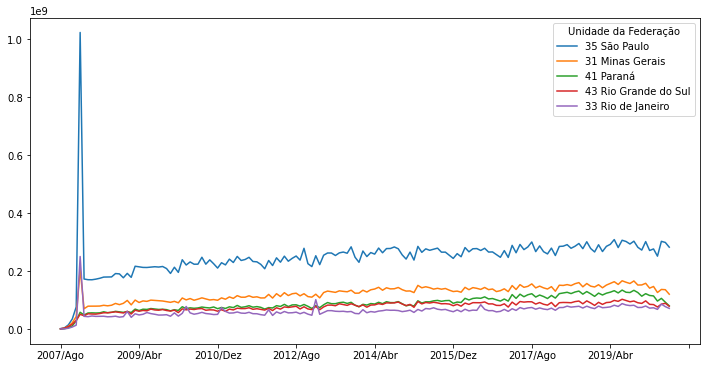

In [ ]:
dadosPorMaiorDespesa.head(5).T.plot(figsize=(12,6))

Desafio 01: deixar o gráfico mais bonito e legível (dados de atendimento, sem o agendamento)

Desafio 02: coloque um outro estado qualquer na lista dos 5...

Desafio 03: arrume a escala para tirar o pico de dados no início.

Vamos ignorar estas primeiras colunas com distorção... E isso será a partir da criação do índice com as colunas que queremos selecionar.

In [ ]:
minhasColunasDeAnalise = dadosPorMaiorDespesa.columns[6:]

In [ ]:
dadosPorMaiorDespesa[minhasColunasDeAnalise].head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

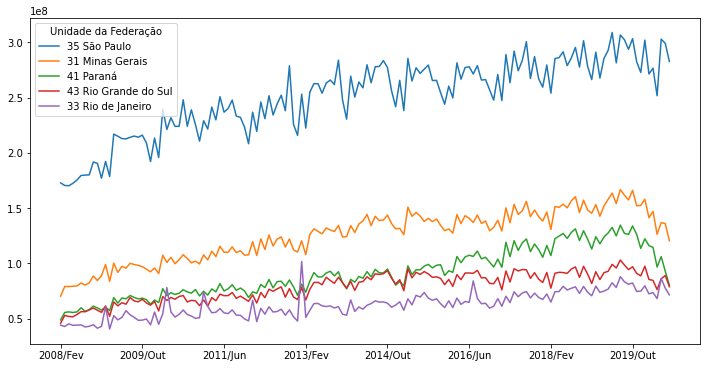

In [ ]:
dadosPorMaiorDespesa[minhasColunasDeAnalise].head(5).T.plot(figsize=(12,6))

Analisando os dados eu vejo uma frequência de liberações, como se isso acontecesse em ciclos de liberação. Em SP é mais acentuado porque tem mais gente. Mas e os picos do Rio?

Desafio 04: verificar casos de dengue e ver se bate com os dados de despesas.
Desafio 05: plotar só os estados do Sudeste e ver se algo afetou RJ e SP de modo comum com um pico 2012/2013.

## Módulo 04: início

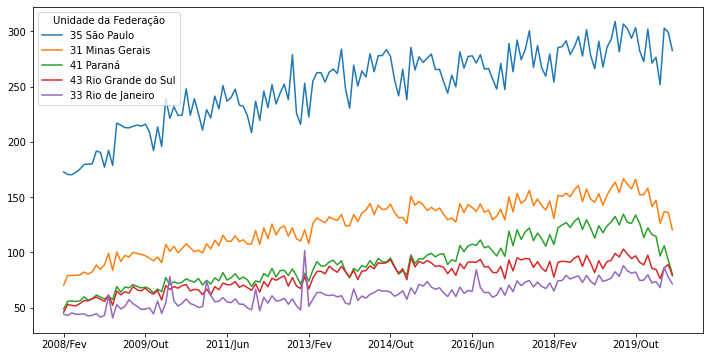

In [ ]:
dadosPorMaiorDespesa = dadosPorMaiorDespesa/1000000
dadosPorMaiorDespesa[minhasColunasDeAnalise].head(5).T.plot(figsize=(12,6))

#De Jan/2012 até Março/2020 (comando todo na mesma linha)

Detalhe interessante: se eu colocar o comando de limitação antesdo gráfico, ele cria um retângulo vazio com as minhas definições. Já, se eu coloco o comando depois, aí sim ele coloca os limites no gráfico plotado.

(0.0, 350.0)

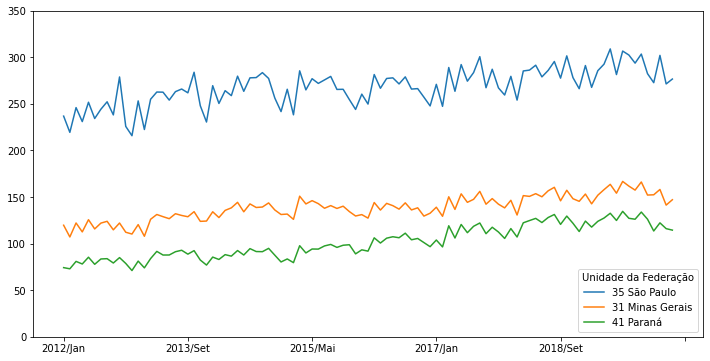

In [ ]:
dadosPorMaiorDespesa[dadosPorMaiorDespesa.columns[53:-4]].head(3).T.plot(figsize=(12,6))
plt.ylim(0,350)

Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

## Módulo 05: início

In [ ]:
mesMaisRecente = dadosPorMaiorDespesa.columns[-1]
dadosPorMaiorDespesa.columns[-1]

'2020/Jul'

Os dados com minha base trabalhada, em dadosUteis, como tem Total e Região, preciso colocar -3 no índice, para indicar a 3ª coluna do final para o começo (direita para esquerda). Aí vejo que é mesmo 2020/Jul... Tudo certo como deveria, pois um data set derivou do outro.

In [ ]:
dadosUteis.columns[-3]

'2020/Jul'

In [ ]:
mesMaisRecente

'2020/Jul'

In [ ]:
dadosPorMaiorDespesa[mesMaisRecente].head(5)

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

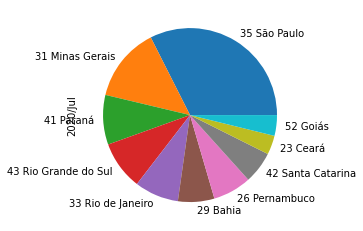

In [ ]:
dadosPorMaiorDespesa[mesMaisRecente].head(10).plot(kind='pie')

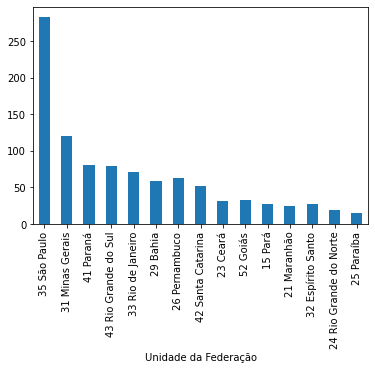

In [ ]:
dadosPorMaiorDespesa[mesMaisRecente].head(15).plot(kind='bar')

# Desafio 01: vou comparar em lista com a média (ele queria com um Estado, mas não vejo graça assim)

In [ ]:
mediaDespesas = dadosPorMaiorDespesa[mesMaisRecente].mean()
dadosPorMaiorDespesa[mesMaisRecente]/mediaDespesas

Unidade da Federação
35 São Paulo             6.94
31 Minas Gerais          2.96
41 Paraná                1.97
43 Rio Grande do Sul     1.94
33 Rio de Janeiro        1.76
29 Bahia                 1.45
26 Pernambuco            1.53
42 Santa Catarina        1.27
23 Ceará                 0.76
52 Goiás                 0.82
15 Pará                  0.68
21 Maranhão              0.60
32 Espírito Santo        0.67
24 Rio Grande do Norte   0.48
25 Paraíba               0.38
53 Distrito Federal      0.55
50 Mato Grosso do Sul    0.31
22 Piauí                 0.44
27 Alagoas               0.32
51 Mato Grosso           0.32
13 Amazonas              0.33
28 Sergipe               0.08
17 Tocantins             0.11
11 Rondônia              0.18
12 Acre                  0.03
14 Roraima               0.07
16 Amapá                 0.05
Name: 2020/Jul, dtype: float64

# Desafio 02: colocar grid (matplotlib e pandas)

Colocando o gráfico em ordem decrescente da coluna atual (ele estava em ordem decrescente pelo total) 

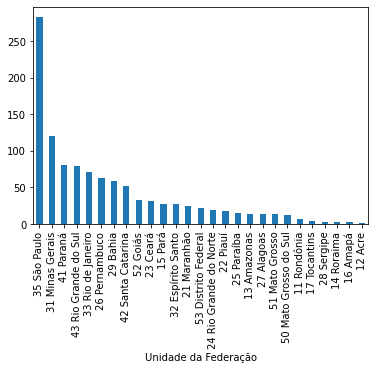

In [ ]:
dadosPorMaiorDespesa[mesMaisRecente].sort_values(ascending=False).plot(kind='bar')

#Desafio 03: gasto por população de 2 estados